In [243]:
colors_base = {
"00":"c64_black",  
"01":"c64_white",  
"02":"c64_red",    
"03":"c64_cyan",   
"04":"c64_purple", 
"05":"c64_green",  
"06":"c64_blue",   
"07":"c64_yellow", 
"08":"c64_orange", 
"09":"c64_brown",  
"0a":"c64_ltred",  
"0b":"c64_gray1",  
"0c":"c64_lightgray",  
"0d":"c64_ltgreen",
"0e":"c64_ltblue", 
"0f":"c64_gray3",  
}
colors = [v for k,v in colors_base.items()]
    
c64_to_rgb = {
"c64_black": "#000000",     
"c64_white": "#ffffff",     
"c64_red": "#880000",       
"c64_cyan":  "#aaffee",     
"c64_purple": "#cc44cc",    
"c64_green": "#00cc55",     
#"c64_blue":  "#0000aa",     
"c64_blue":  "#0088ff",     
"c64_yellow":  "#eeee77",   
"c64_orange":  "#dd8855",   
"c64_brown": "#664400",     
"c64_ltred": "#ff7777",  
"c64_gray1":  "#333333",    
"c64_ltgreen": "#aaff66",
"c64_ltblue":  "#0088ff",
"c64_lightgrey": "#bbbbbb", 
"c64_lightgray": "#bbbbbb", 
"c64_gray3": "#bbbbbb",                             
}


In [142]:
log_file = "PsychedeliaPaintTrace.txt"
input_file = open(log_file,'r')

ram_history = []
lines = input_file.readlines()
c = 0
for i in range(5, len(lines), 67):
    raw_ram = [l[9:60].split() for l in lines[i:i+64]]
    raw_ram = [int(v,16) & 0x0f for l in raw_ram for v in l]
    color_ram = [raw_ram[v:v+40] for v in range(0, len(raw_ram), 40)]
    ram_history += [(f"evolutions/screen{c}.png", color_ram)]
    c += 1


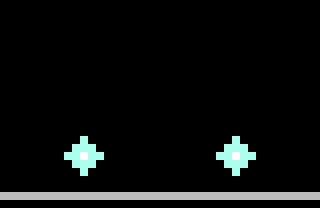

In [118]:
from PIL import Image, ImageColor
cols=40
rows=26
bits=8
# PIL accesses images in Cartesian co-ordinates, so it is Image[columns, rows]
img = Image.new( 'RGB', (cols*bits,rows*bits), "black") # create a new black image
pixels = img.load() # create the pixel map

bit_array = [['1' for i in range(8)] for j in range(8)]

def paintChar(origin, pixels, cv):
    c, r = origin
    x_o, y_o = c*8, r*8
    for y, l in enumerate(bit_array):
        for x,bit in enumerate(l):
            if bit == "0":
                continue
            color = c64_to_rgb[colors[cv]]
            pixels[x_o+x, y_o+y] = ImageColor.getrgb(color)

for f,r in ram_history[:2]:
    for y, l in enumerate(r):
        for x, v in enumerate(l):
            paintChar((x,y), pixels, v)
img



In [160]:
import matplotlib.pyplot as plt


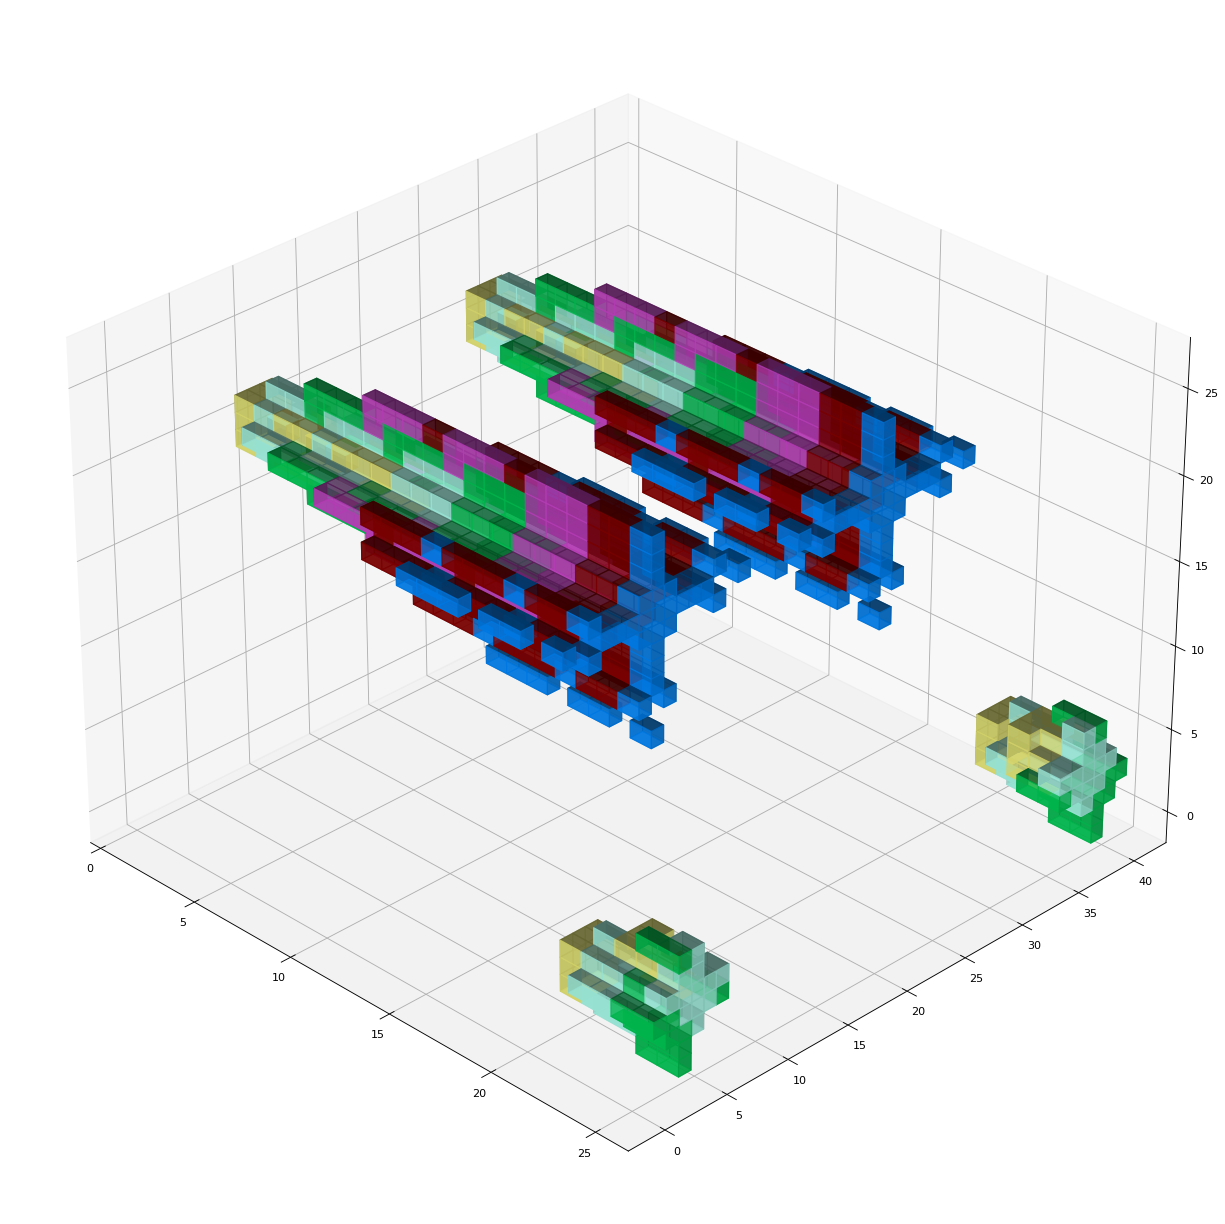

In [244]:
import numpy as np
plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams['figure.dpi'] = 80

screens = [r for _,r in ram_history][:26]

# prepare some coordinates
x, y, z = np.indices((40,26,len(screens)))
voxelarray = np.zeros((40,26,len(screens)), dtype=bool)
colorarray = np.empty(voxelarray.shape, dtype=object)
for zp,screen in enumerate(screens):
    for yp, row in enumerate(screen):
        for xp, col in enumerate(row):
            # Skip black, white and gray cells
            if col in [0,1,0x0c]:
                continue
            cube = (x == xp) & (y == yp) & (z == zp)
            voxelarray |= cube
            color = c64_to_rgb[colors[col]]
            colorarray[cube] = color+"c0"

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxelarray, facecolors=colorarray, edgecolors=colorarray,)
ax.view_init(azim=-45, vertical_axis='y')
plt.show()


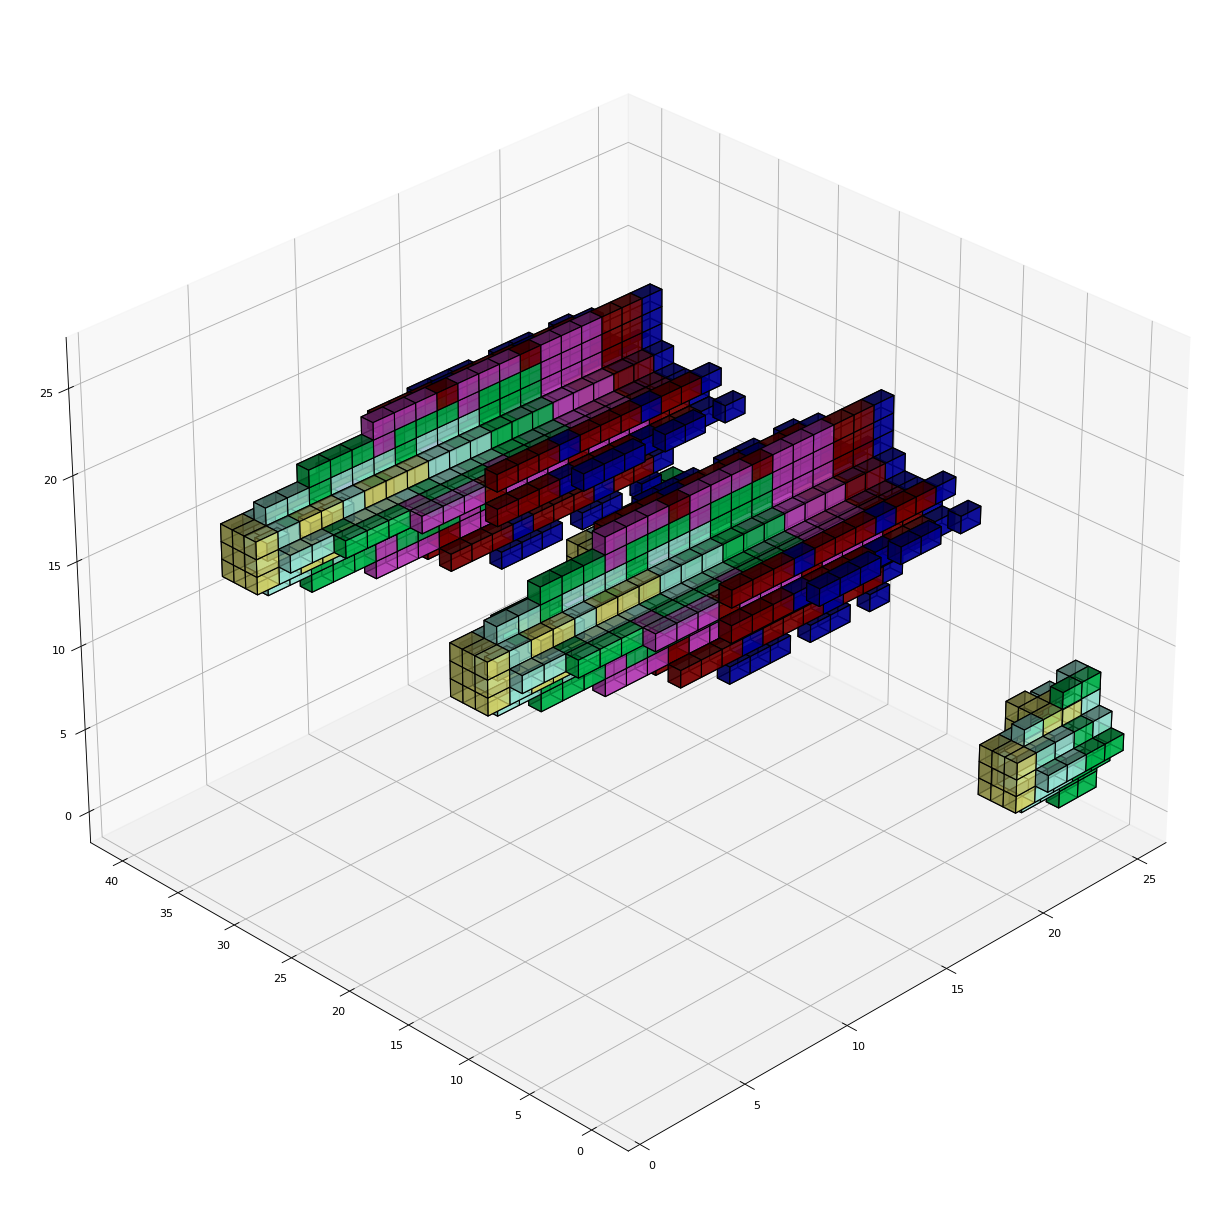

In [232]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxelarray, facecolors=colorarray, edgecolor='k')
ax.view_init(azim=-135, vertical_axis='y')
plt.show()

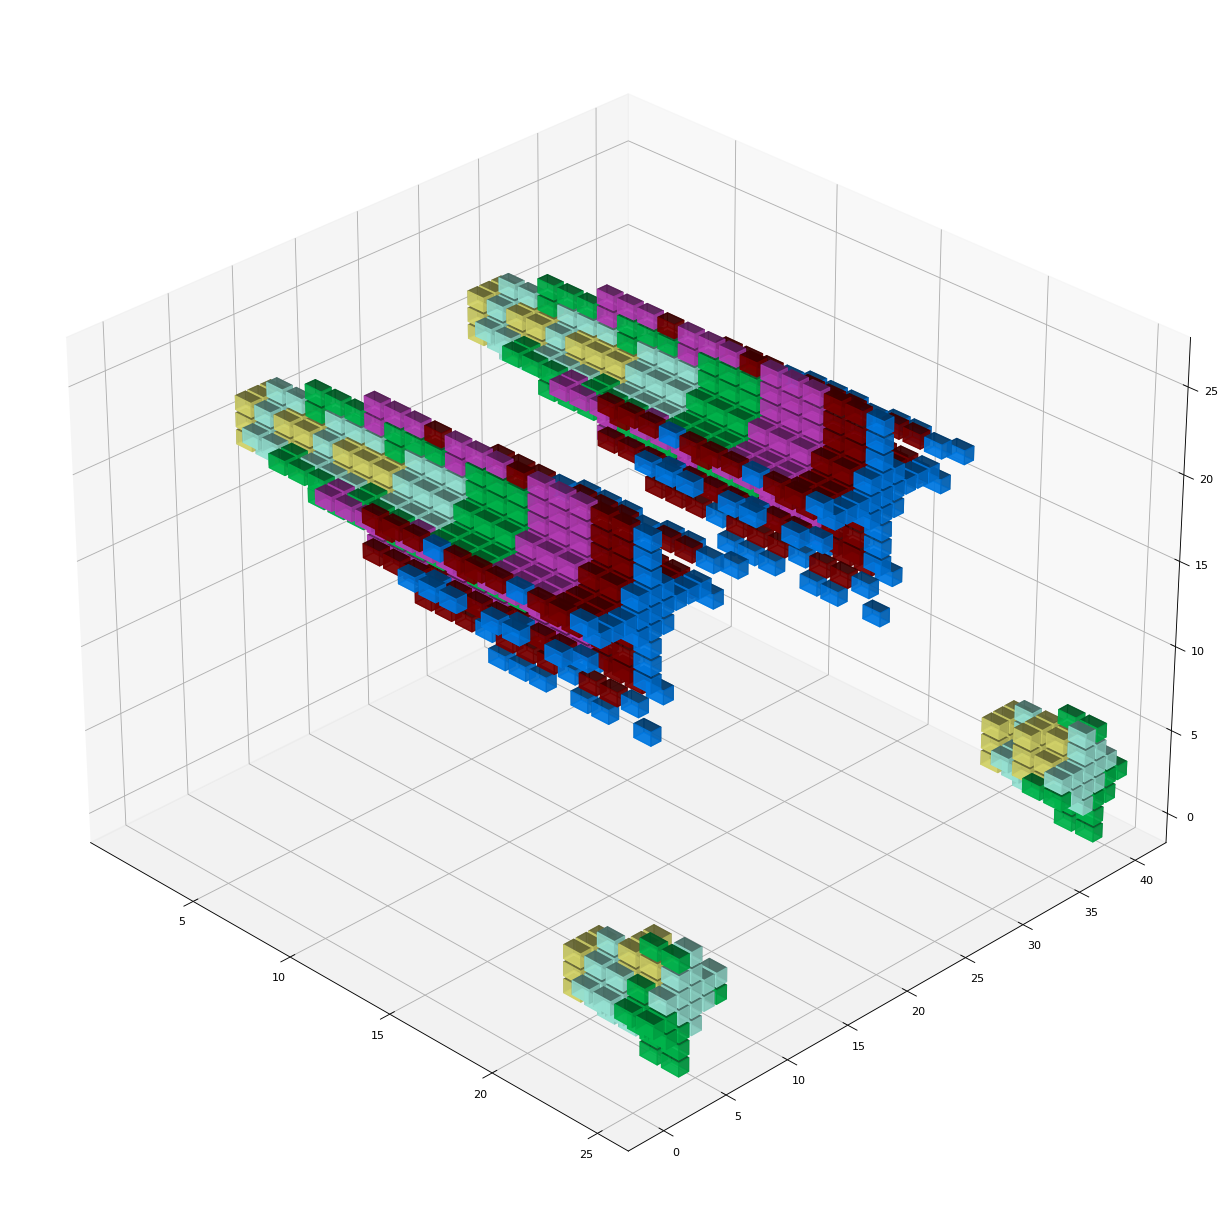

In [245]:
import numpy as np
plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams['figure.dpi'] = 80

screens = [r for _,r in ram_history][:26]

def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

# prepare some coordinates
x, y, z = np.indices((40,26,len(screens)))
voxelarray = np.zeros((40,26,len(screens)), dtype=bool)
colorarray = np.empty(voxelarray.shape, dtype=object)
for zp,screen in enumerate(screens):
    for yp, row in enumerate(screen):
        for xp, col in enumerate(row):
            # Skip black, white and gray cells
            if col in [0,1,0x0c]:
                continue
            cube = (x == xp) & (y == yp) & (z == zp)
            voxelarray |= cube
            color = c64_to_rgb[colors[col]]
            colorarray[cube] = color+"c0"

# upscale the above voxel image, leaving gaps
filled_2 = explode(voxelarray)
ecolors_2 = explode(colorarray)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.10
y[:, 0::2, :] += 0.10
z[:, :, 0::2] += 0.10
x[1::2, :, :] += 0.90
y[:, 1::2, :] += 0.90
z[:, :, 1::2] += 0.90

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(x,y,z,filled_2, facecolors=ecolors_2, edgecolors=ecolors_2,)
ax.view_init(azim=-45, vertical_axis='y')
plt.show()


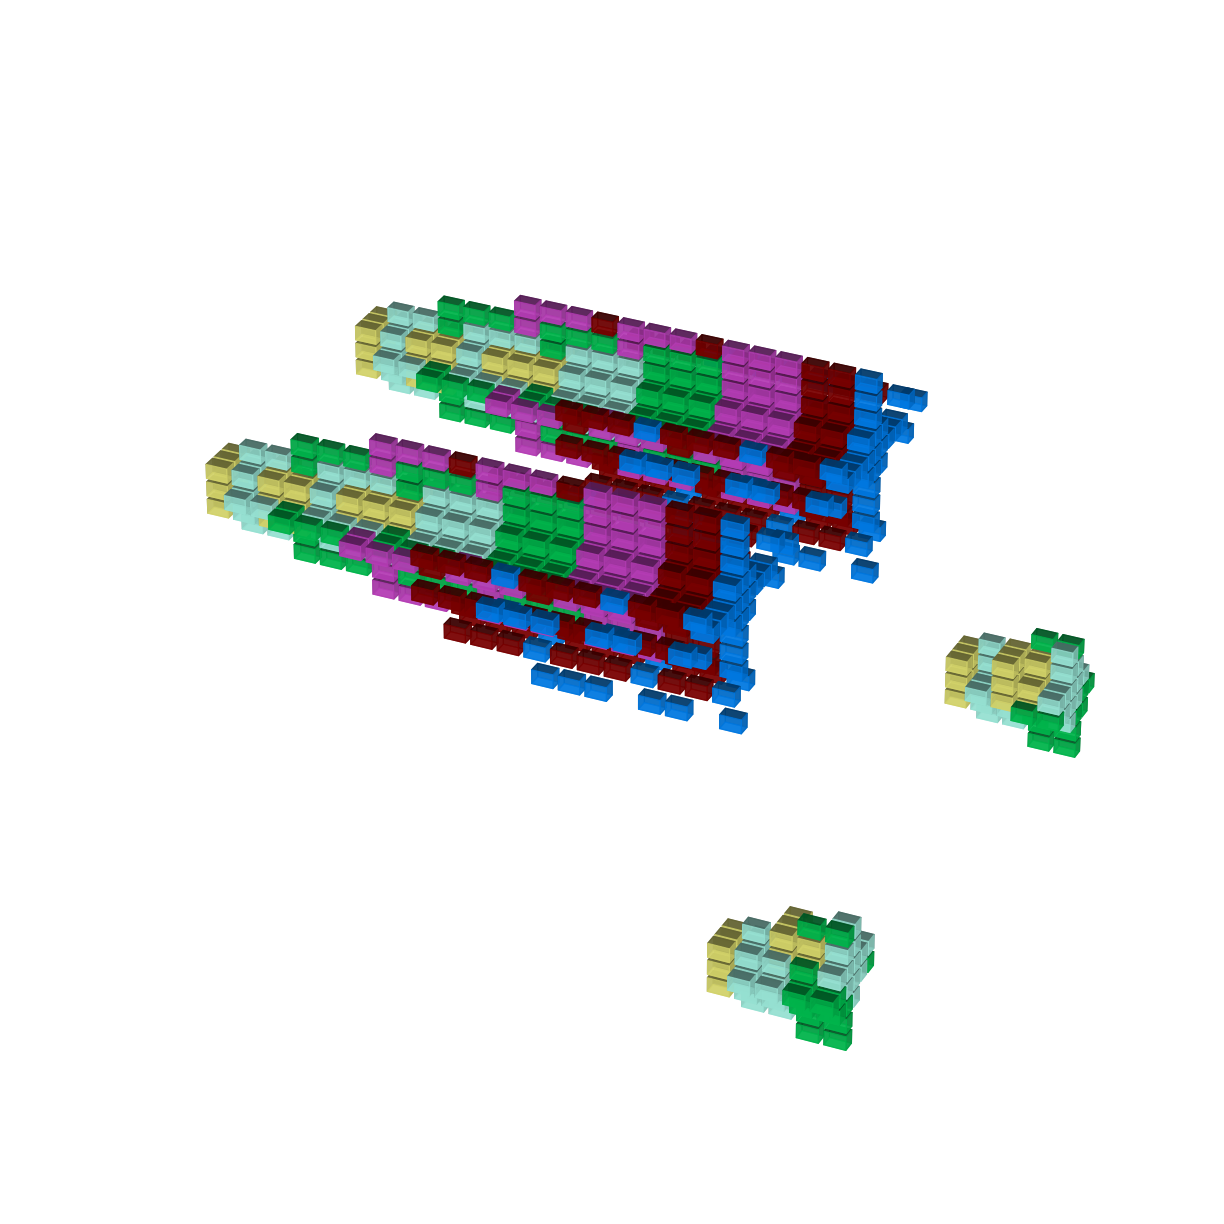

In [249]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(x,y,z,filled_2, facecolors=ecolors_2, edgecolors=ecolors_2,)
ax.view_init(azim=-65, vertical_axis='y')
# Hide grid lines
ax.axis('off')
plt.show()

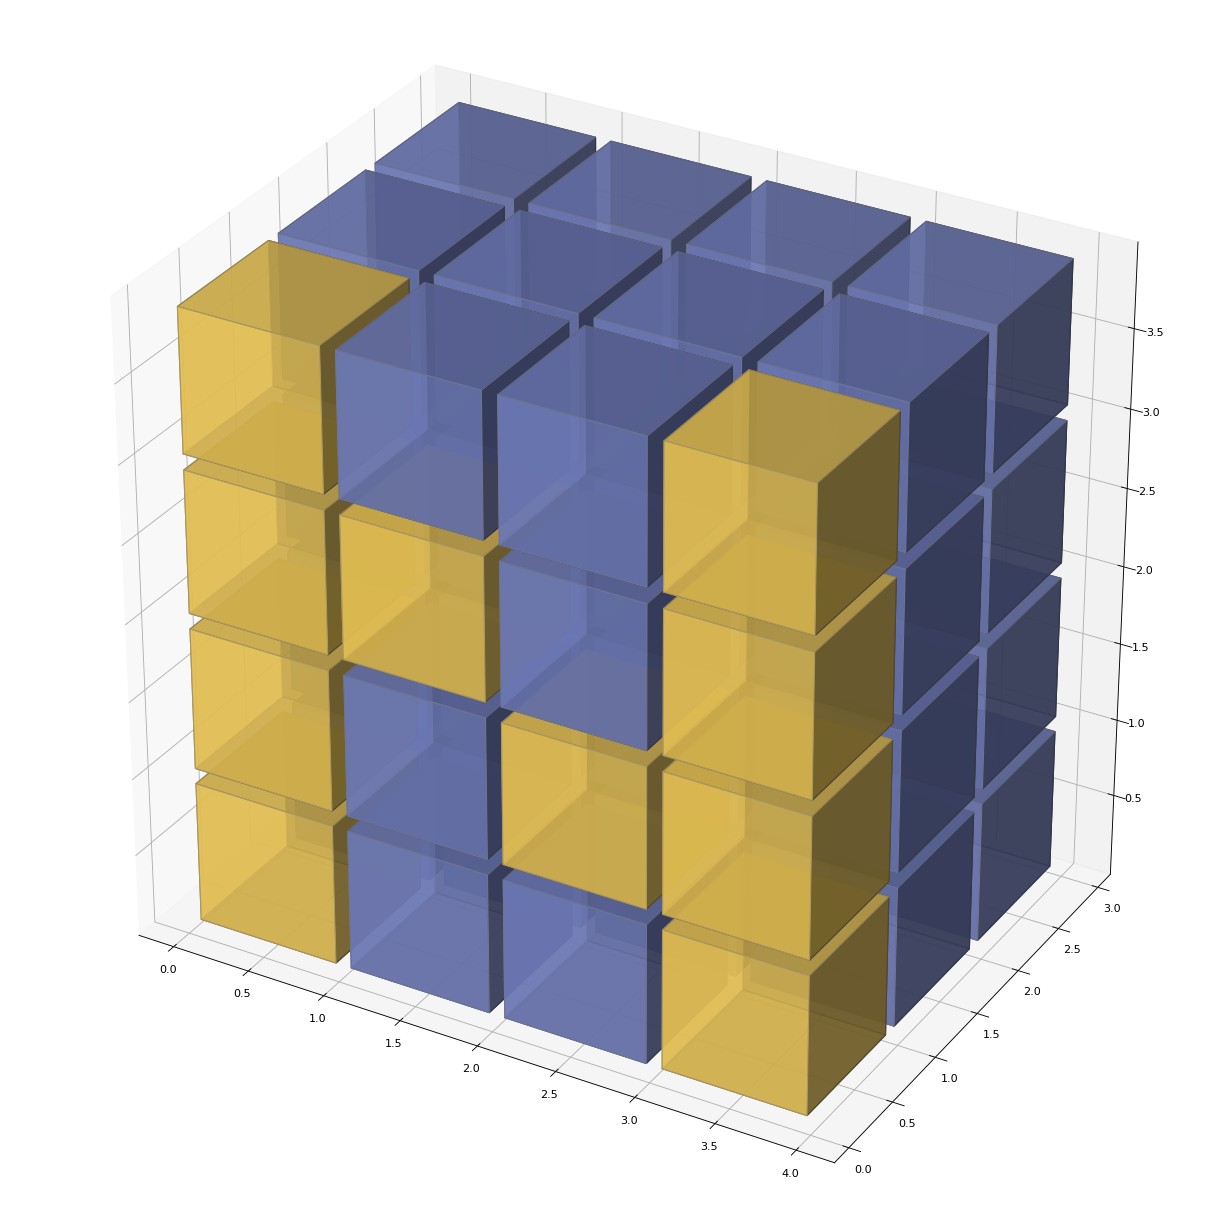

In [233]:
import matplotlib.pyplot as plt
import numpy as np


def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

# build up the numpy logo
n_voxels = np.zeros((4, 3, 4), dtype=bool)
n_voxels[0, 0, :] = True
n_voxels[-1, 0, :] = True
n_voxels[1, 0, 2] = True
n_voxels[2, 0, 1] = True
facecolors = np.where(n_voxels, '#FFD65DC0', '#7A88CCC0')
edgecolors = np.where(n_voxels, '#BFAB6E', '#7D84A6')
filled = np.ones(n_voxels.shape)

# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)
ax.set_aspect('equal')

plt.show()

In [ ]:
img = img.resize((img.width * 4, img.height * 4), Image.NEAREST)
file_name = f"../src/titlescreen/titlescreen_textonly.png"
img.save(file_name)

pixels = img.load() # create the pixel map
for y, l in enumerate(screen_ram):
    for x in range(img.size[0]):
        pixels[x, y*8*4] = ImageColor.getrgb("gray")
for y in range(0,img.size[1]):
    for x in range(0,40):
        pixels[x*8*4, y] = ImageColor.getrgb("gray")

file_name = f"../src/titlescreen/titlescreen_textonly_grid.png"
img.save(file_name)
img
